# Gerardo de Miguel González

## M1964 Assignment: Building a weather generator

### R implementation

### 1. Description

Weather generators are computational models which generate (daily) synthetic series of random values simulating the distribution of a particular meteorological variable. Precipitation is the most popular example due to its mixed character: discrete (ocurrence: dry or wet) and continuous (rain amount for wet days). The discrete part is typically characterized by the frequency of wet/dry days (say, e.g. 0.53/0.47 in Santander), whereas the continuous is typically characterized by an exponential distribution defined by a rate parameter.

The main control structures (conditionals and loops) will be used and applied to build a simple weather generator and create artificial precipitation amount series. Some functions which simulate (pseudo)random numbers from different families of distributions (uniform and exponential) will also be used. This is a key task for several computational statistics problems.

### 2. How does a precipitation time series look like?

In order to work with real data, we will use two files with daily information for two weather stations: Santander CMT (RR_STAID003922.txt) and Santander/Parayas (RR_STAID003923.txt). The former is located in the Santander regional center (close to el Faro de Cabo Mayor) and the latter is located in Santander airport. 

#### ::GMG::Task 1

I will open Santander CMT dataset (RR_STAID003922.txt) and see the structure. it has some lines with information (to be skipped) and then a header followed by number in columns (STAID: the code of the station; SOUI: the international code of the station; DATA: the day; RR: precipitation value; Q_RR: a quality control flat, 0: OK; 9: missing data.

::GMG::First 20 line metadata exceprt ...

> EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 10-11-2017
>
> THESE DATA CAN BE USED FREELY FOR NON-COMMERCIAL RESEARCH PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED: 
>
> Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface
air temperature and precipitation series for the European Climate Assessment.
Int. J. of Climatol., 22, 1441-1453.
>
> Data and metadata available at http://www.ecad.eu
>
> FILE FORMAT (MISSING VALUE CODE = -9999):
>
> 01-06 STAID: Station identifier
> 08-13 SOUID: Source identifier
> 15-22 DATE : Date YYYYMMDD
> 24-28 RR   : Precipitation amount in 0.1 mm
> 30-34 Q_RR : quality code for RR (0='valid'; 1='suspect'; 9='missing')
>
> This is the blended series of station SANTANDER CMT, SPAIN (STAID: 3922)
>
> Blended and updated with sources:19972 19981 908023 
>
> See files sources.txt and stations.txt for more info.

#### ::GMG::Task 2

I will load the Santander CMT dataset and plot the first year available of precipitation data (RR column, year 1924 it seems ...). As the precipitation data is in 0.1 mm units so the actual mm (l/m²) is the data value divided by 10. I will also check that the dataset has no suspect or missing values.

In [1]:
#::GMG::Loading data for Santander CMT
#       Skip first 20 line dataset description and include header with column names:
#
#       01-06 STAID: Station identifier
#       08-13 SOUID: Source identifier
#       15-22 DATE : Date YYYYMMDD
#       24-28 RR   : Precipitation amount in 0.1 mm
#       30-34 Q_RR : quality code for RR (0='valid'; 1='suspect'; 9='missing')
#
#       FILE FORMAT (MISSING VALUE CODE = -9999)
#
precip_s<-read.csv('RR_STAID003922.txt',skip = 20, header = T)

In [2]:
#::GMG::Print the basics of tha dataset
print(paste(class(precip_s),'with',ncol(precip_s),'columns and',nrow(precip_s),'rows.'))
print('Description:')
str(precip_s)
print('First rows ...')
head(precip_s)
print ('... last rows')
tail(precip_s)

[1] "data.frame with 5 columns and 34273 rows."
[1] "Description:"
'data.frame':	34273 obs. of  5 variables:
 $ STAID: int  3922 3922 3922 3922 3922 3922 3922 3922 3922 3922 ...
 $ SOUID: int  19972 19972 19972 19972 19972 19972 19972 19972 19972 19972 ...
 $ DATE : int  19240101 19240102 19240103 19240104 19240105 19240106 19240107 19240108 19240109 19240110 ...
 $ RR   : int  1 25 7 96 0 0 4 15 65 13 ...
 $ Q_RR : int  0 0 0 0 0 0 0 0 0 0 ...
[1] "First rows ..."


STAID,SOUID,DATE,RR,Q_RR
3922,19972,19240101,1,0
3922,19972,19240102,25,0
3922,19972,19240103,7,0
3922,19972,19240104,96,0
3922,19972,19240105,0,0
3922,19972,19240106,0,0


[1] "... last rows"


,STAID,SOUID,DATE,RR,Q_RR
34268,3922,19981,20171026,0,0
34269,3922,19981,20171027,0,0
34270,3922,19981,20171028,0,0
34271,3922,19981,20171029,21,0
34272,3922,19981,20171030,17,0
34273,3922,19981,20171031,0,0


In [3]:
#::GMG::Basic question about dataset QoS (Q_RR)
#       Q: How many 'suspect' and 'missing' values (RR) are there?
#print(paste('There are',length(which(precip_s$Q_RR == 1)),'suspect values.'))
#print(paste('There are',length(which(precip_s$Q_RR == 9)),'missing values.'))
print(paste('There are',sum(precip_s$Q_RR == 1),'suspect values.'))
print(paste('And there are',sum(precip_s$Q_RR == 9),'missing values.'))
print(paste('So There are',sum(precip_s$Q_RR == 0),'of',length(precip_s$Q_RR),'valid values left.'))
#print(table(precip_s$Q_RR))
#
#::GMG::See
#       https://stackoverflow.com/questions/1923273/counting-the-number-of-elements-with-the-values-of-x-in-a-vector
#       https://www.theanalysisfactor.com/r-tutorial-count/
#
#::GMG::A Question about precipitation amount i.e. 0.1 mm unit in RR column ....
#
#  See  https://earthscience.stackexchange.com/questions/3132/intuitive-explanation-of-precipitation-amount/3175#3175
#       https://earthscience.stackexchange.com/questions/14587/what-does-a-mm-of-rain-mean
#       http://www.bom.gov.au/climate/data-services/content/faqs-elements.html
print(paste('precipitation (mm ~ l/m²) max=',max(precip_s$RR/10),
            'median=',median(precip_s$RR/10),'min=',min(precip_s$RR/10)))

[1] "There are 0 suspect values."
[1] "And there are 0 missing values."
[1] "So There are 34273 of 34273 valid values left."
[1] "precipitation (mm ~ l/m²) max= 126.2 median= 0 min= 0"


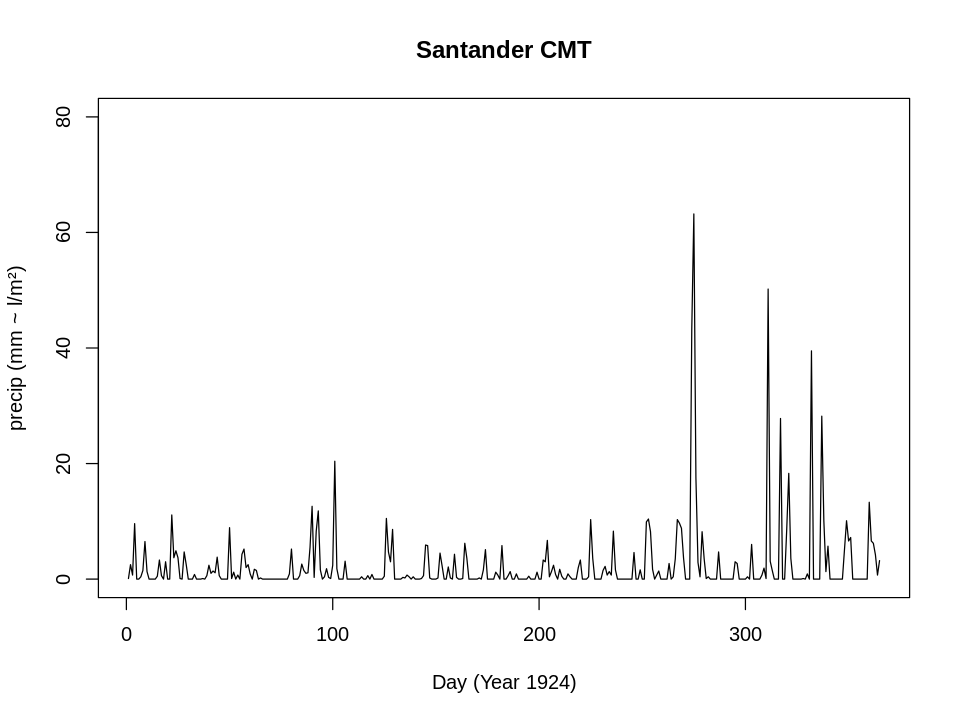

In [4]:
#::GMG::Ploting data for Santander CMT
#       NOTE:options() needed to fix the plot size in some jupyter notebooks environments
#            (this tested in Microsoft Azure Notebooks)
#       SEE: Blog Revolutions: Resizing plots in the R kernel for Jupyter notebooks
#       https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
options(repr.plot.width=8, repr.plot.height=6)
plot(precip_s$RR[1:365]/10, 
     type="l",
     xlim = c(1,365), # first year
     ylim = c(0,80),
     ylab = 'precip (mm ~ l/m²)', 
     xlab = 'Day (Year 1924)',
     main = 'Santander CMT')   

#### ::GMG::Task 3

I will load the dataset for Parayas and plot the first year available. The time span of this series is not the same than in the first one. It starts in september 1953 and then spans until 2017. In addition, this series also contains missing data characterized by the number -9999 in RR column and Q_RR column value of 9. Then again, the units of the data is "10 * mm". I have to divide by 10 in order to get "mm" (liters per square meter).

::GMG::Here it is the 20 line metada section within the TXT file

> EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 10-11-2017
>
> THESE DATA CAN BE USED FREELY FOR NON-COMMERCIAL RESEARCH PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED: 
>
> Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface air temperature and precipitation series for the European Climate Assessment.
>
> Int. J. of Climatol., 22, 1441-1453.
>
> Data and metadata available at http://www.ecad.eu
>
> FILE FORMAT (MISSING VALUE CODE = -9999):
>
> 01-06 STAID: Station identifier
> 08-13 SOUID: Source identifier
> 15-22 DATE : Date YYYYMMDD
> 24-28 RR   : Precipitation amount in 0.1 mm
> 30-34 Q_RR : quality code for RR (0='valid'; 1='suspect'; 9='missing')
>
> This is the blended series of station SANTANDER/PARAYAS, SPAIN (STAID: 3923)
>
> Blended and updated with sources:19990 
>
> See files sources.txt and stations.txt for more info.

Same structure of columns. Let's get this task done.

::GMG::References used in this task

 - [Blog Revolutions: Resizing plots in the R kernel for Jupyter notebooks](https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html)
 - [Quick R Missing Data](https://www.statmethods.net/input/missingdata.html)
 - [UC Business Analytics R Programming Guide: Dealing with Missing Values](http://uc-r.github.io/missing_values)

In [5]:
#::GMG:: Load the series for Parayas and remove missing data.
#       Skip first 20 line dataset description and include header with column names:
#
#       01-06 STAID: Station identifier
#       08-13 SOUID: Source identifier
#       15-22 DATE : Date YYYYMMDD
#       24-28 RR   : Precipitation amount in 0.1 mm
#       30-34 Q_RR : quality code for RR (0='valid'; 1='suspect'; 9='missing')
#
#       FILE FORMAT (MISSING VALUE CODE = -9999)
#
precip_p <- read.csv("RR_STAID003923.txt",skip = 20, header = T)

In [6]:
#::GMG::Print the basics of tha dataset as before ....
print(paste(class(precip_p),'with',ncol(precip_p),'columns and',nrow(precip_p),'rows.'))
print('Description:')
str(precip_p)
print('First rows ...')
head(precip_p)
print ('... last rows.')
tail(precip_p)

[1] "data.frame with 5 columns and 23437 rows."
[1] "Description:"
'data.frame':	23437 obs. of  5 variables:
 $ STAID: int  3923 3923 3923 3923 3923 3923 3923 3923 3923 3923 ...
 $ SOUID: int  19990 19990 19990 19990 19990 19990 19990 19990 19990 19990 ...
 $ DATE : int  19530901 19530902 19530903 19530904 19530905 19530906 19530907 19530908 19530909 19530910 ...
 $ RR   : int  -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999 ...
 $ Q_RR : int  9 9 9 9 9 9 9 9 9 9 ...
[1] "First rows ..."


STAID,SOUID,DATE,RR,Q_RR
3923,19990,19530901,-9999,9
3923,19990,19530902,-9999,9
3923,19990,19530903,-9999,9
3923,19990,19530904,-9999,9
3923,19990,19530905,-9999,9
3923,19990,19530906,-9999,9


[1] "... last rows."


,STAID,SOUID,DATE,RR,Q_RR
23432,3923,19990,20171026,0,0
23433,3923,19990,20171027,1,0
23434,3923,19990,20171028,0,0
23435,3923,19990,20171029,86,0
23436,3923,19990,20171030,34,0
23437,3923,19990,20171031,0,0


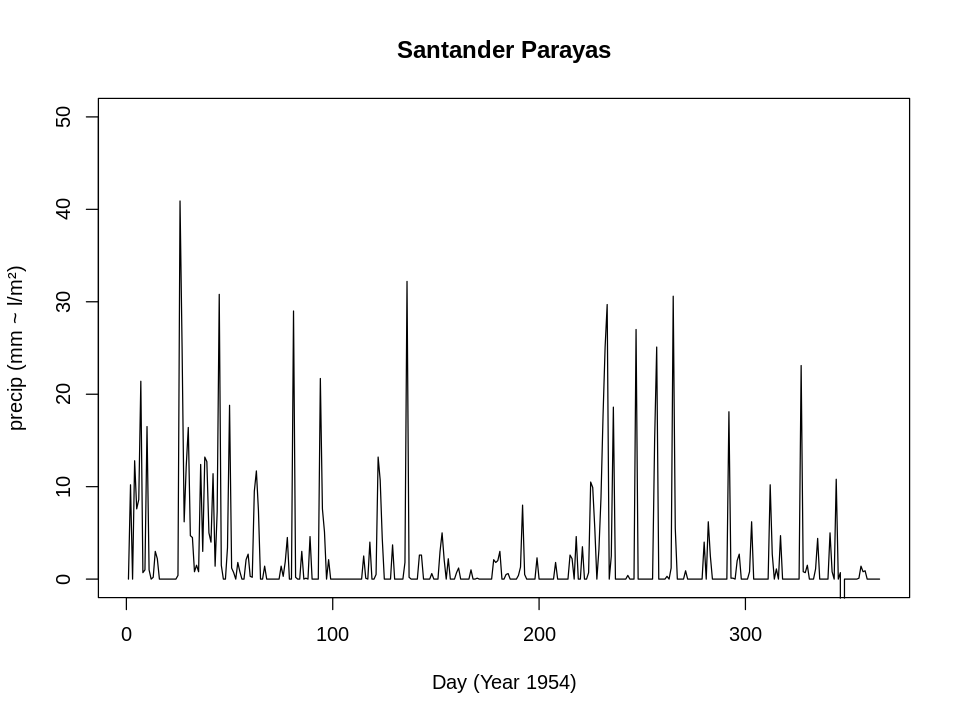

In [7]:
#::GMG::Ploting data for Santander Parayas
#       NOTE:options() needed to fix the plot size in some jupyter notebooks environments
#            (this tested in Microsoft Azure Notebooks)
#       See: Blog Revolutions: Resizing plots in the R kernel for Jupyter notebooks
#
options(repr.plot.width=8, repr.plot.height=6)
plot(precip_p$RR[123:487]/10, 
     type="l",
     xlim = c(1,365), # year 1954
     ylim = c(0,50),
     ylab = 'precip (mm ~ l/m²)', 
     xlab = 'Day (Year 1954)',
     main = 'Santander Parayas')  

::GMG::**NOTE**: See *the glitch* at the end of the year! There is a missing value ...

In [8]:
precip_p_y_1954<-precip_p$RR[123:487]
str(precip_p_y_1954)
tail(precip_p_y_1954,n = 30)
print(precip_p[which(precip_p_y_1954 == -9999)+122,])

 int [1:365] 0 102 0 128 76 86 214 7 10 165 ...


[1]     0     0     0     0     0    50     8     0   108     0     7 -9999
[13]     0     0     0     0     0     0     0     1    14     8     9     0
[25]     0     0     0     0     0     0

    STAID SOUID     DATE    RR Q_RR
469  3923 19990 19541213 -9999    9


In [9]:
#::GMG::Basic question about dataset QoS (Q_RR), again!
#       Q1: How many 'suspect' and 'missing' values (RR) are there?
print(paste('There are',sum(precip_p$Q_RR == 1),'suspect values.'))
print(paste('And there are',sum(precip_p$Q_RR == 9),'missing values.'))
print(paste('So There are',sum(precip_p$Q_RR == 0),'of',length(precip_p$Q_RR),'valid values left.'))
#       Q2: What is max and min precip. save for the'suspect' and 'missing' values?
print(
    paste(
        'precipitation (mm ~ l/m²) max=',max(precip_p$RR)/10,
        'min=',min(precip_p$RR & 
                   precip_p$Q_RR != 1 & 
                   precip_p$Q_RR != 9)/10
    )
)

[1] "There are 0 suspect values."
[1] "And there are 832 missing values."
[1] "So There are 22605 of 23437 valid values left."
[1] "precipitation (mm ~ l/m²) max= 134.4 min= 0"


In [10]:
#::GMG::What do I do about missing values? (see references of this task)
#       Recoding Q_RR == 9 to NA
precip_p$RR[precip_p$Q_RR==9] <- NA
print(
    paste('After setting NA to the missing values, there are',
          sum(is.na(precip_p$RR)),'NA values.'
         )
)

[1] "After setting NA to the missing values, there are 832 NA values."


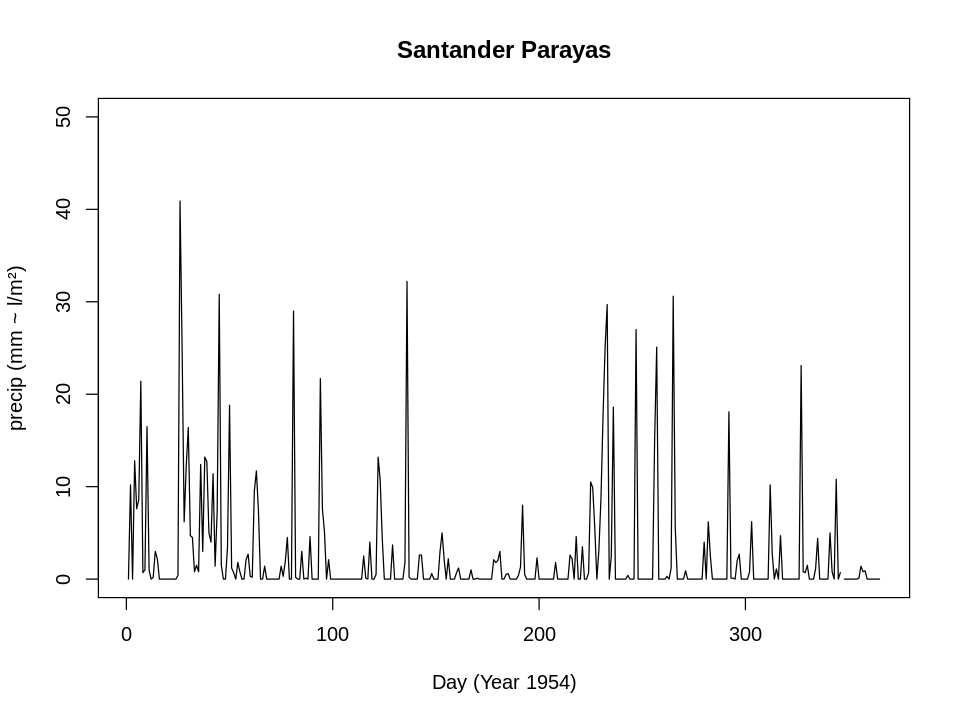

In [11]:
#::GMG::Ploting again data for Santander Parayas with logical indexing
start<-precip_p$DATE >= 19540101 
end<-precip_p$DATE <= 19541231
cond<-which(start & end)
options(repr.plot.width=8, repr.plot.height=6)
plot(precip_p$RR[cond]/10, 
     type="l",
     xlim = c(1,365), # year 1954
     ylim = c(0,50),
     ylab = 'precip (mm ~ l/m²)', 
     xlab = 'Day (Year 1954)',
     main = 'Santander Parayas') 

::GMG::**NOTE**: See *the hole* at the end of the year! There is the **NA** value ...

~~::GMG::I decide to set the NAs to 0. I'm aware that action may have consequences later.~~

In [12]:
#precip_p$RR[is.na(precip_p$RR)] <- 0

#print(
#    paste('After setting NA to 0, there are',
#          sum(is.na(precip_p$RR)),'NA values.'
#         )
#)

#plot(precip_p$RR[cond]/10, 
#     type="l",
#     xlim = c(1,365), # year 1954
#     ylim = c(0,50),
#     ylab = 'precip (mm ~ l/m²)', 
#     xlab = 'Day (Year 1954)',
#     main = 'Santander Parayas')

#### Task 4

Both series should be very similar. Compare them using e.g. a scatter plot (points displayed along the diagonal if equal).

::GMG::I've chosen two series of 365 days from the year 1954 common to CMT and Parayas and plotted a scatter plot.

::GMG::References used in this task

 - [QuickR Scatter plots](https://www.statmethods.net/graphs/scatterplot.html)

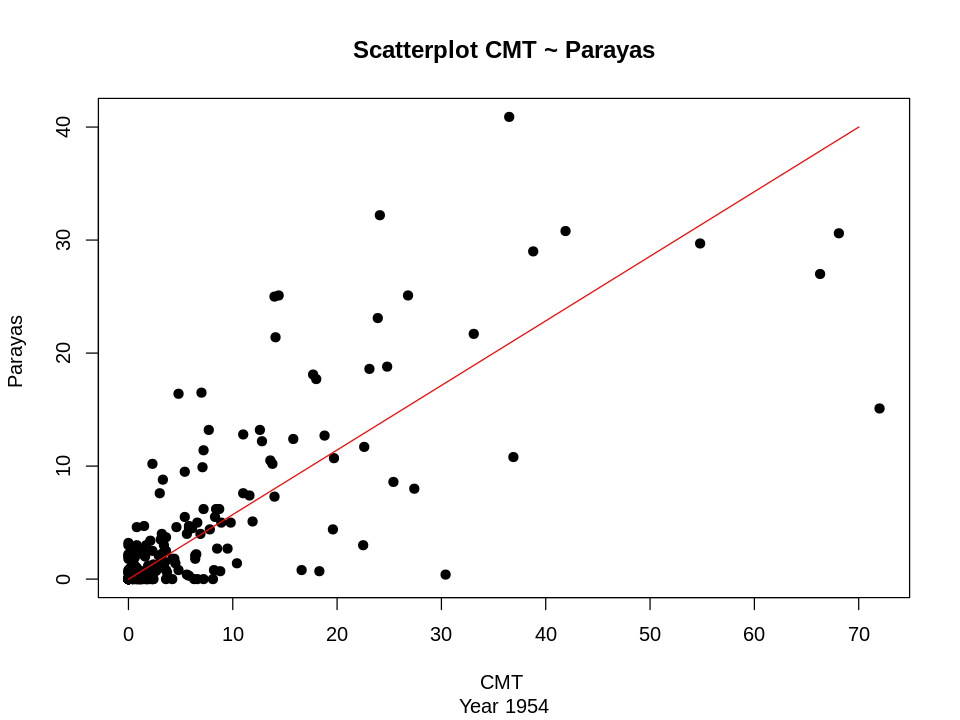

In [13]:
#::GMG::Basic Scatterplot
#::GMG::Vector with 1954 CMT series
start_s<-precip_s$DATE >= 19540101 
end_s<-precip_s$DATE <= 19541231
cond_s<-which(start_s & end_s)
ts<-precip_s$RR[cond_s]/10
#::GMG::Vector with 1954 Parayas series
start_p<-precip_p$DATE >= 19540101 
end_p<-precip_p$DATE <= 19541231
cond_p<-which(start_p & end_p)
tp<-precip_p$RR[cond_p]/10

plot(ts, tp, main="Scatterplot CMT ~ Parayas", sub = "Year 1954",
   xlab="CMT ", ylab="Parayas ", pch=19) 
par(pch=22, col="red")
lines(x = c(0,70), y = c(0,40))

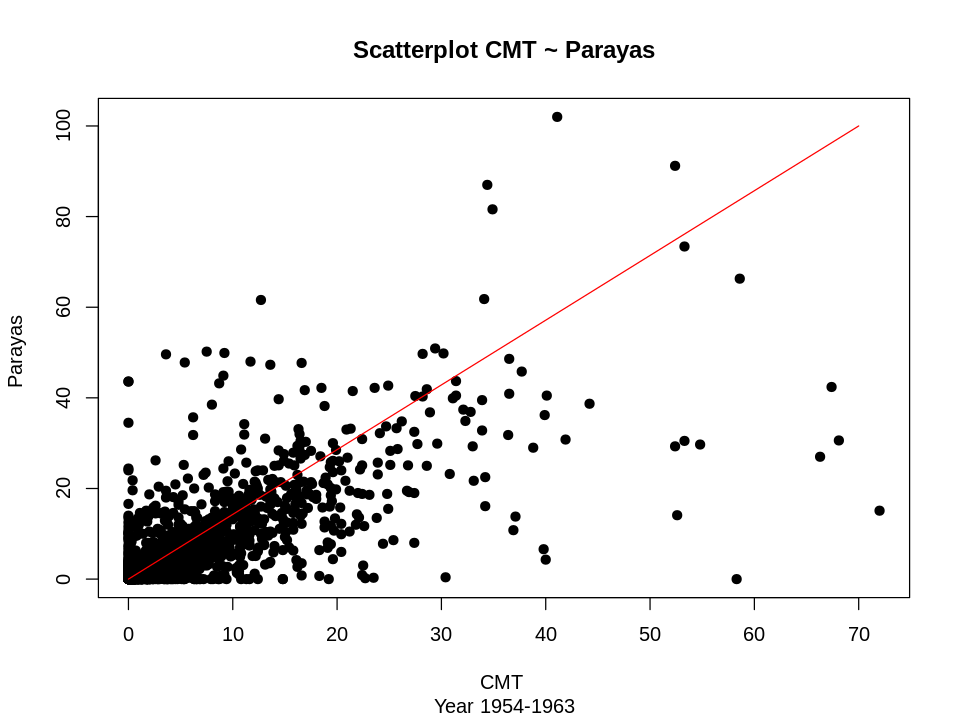

In [14]:
#::GMG::A ten-year period
start<-precip_p$DATE >= 19540101 
end<-precip_p$DATE <= 19631231
cond<-which(start & end)
tp<-precip_p$RR[cond]/10

start_s<-precip_s$DATE >= 19540101 
end_s<-precip_s$DATE <= 19631231
cond_s<-which(start_s & end_s)
ts<-precip_s$RR[cond_s]/10

plot(ts, tp, main="Scatterplot CMT ~ Parayas", sub = "Year 1954-1963",
   xlab="CMT ", ylab="Parayas ", pch=19)
par(pch=22, col="red")
lines(x = c(0,70), y = c(0,100))

#### ::GMG::Task 5

Compute basic statistics for both series:

 - Frequency of wet days (this is the probability of rain)

::GMG::References used in this task

- [BLOGR: Proportions with mean()](https://drsimonj.svbtle.com/proportionsfrequencies-with-mean-and-booleans )

In [15]:
#::GMG::Let's select a common period for both series: 1954-2017 (31/10/2017)
start_s<-precip_s$DATE >= 19540101 
end_s<-precip_s$DATE <= 20171031
cond_s<-which(start_s & end_s)
ts<-precip_s$RR[cond_s]/10 # units (mm ~ l/m²)
paste('Selected:',length(ts),'samples.')

start_p<-precip_p$DATE >= 19540101 
end_p<-precip_p$DATE <= 20171031
cond_p<-which(start_p & end_p)
tp<-precip_p$RR[cond_p]/10 # units (mm ~ l/m²)
paste('Selected:',length(tp),'samples.')

paste('::GMG::WARNING::Be aware of the NAs in Parayas:',
          sum(is.na(precip_p$RR[cond_p])),'NA values.')

#::GMG::Set the threshold to wet/dry to 1 (mm ~ l/m²)
th <- 1
pwet_s = length(which(ts >= th))/length(ts)
#https://drsimonj.svbtle.com/proportionsfrequencies-with-mean-and-booleans 
paste('length like:',pwet_s,'mean() like:',mean(ts>=th))

pwet_p <- length(which(tp >= th & !is.na(tp >= th)))/
            (length(tp) - sum(is.na(precip_p$RR[cond_p])))
paste('length like:',pwet_p,'mean() like:',mean(tp>=th, na.rm = TRUE))

[1] "Selected: 23315 samples."

[1] "Selected: 23315 samples."

[1] "::GMG::WARNING::Be aware of the NAs in Parayas: 808 NA values."

[1] "length like: 0.349860604760884 mean() like: 0.349860604760884"

[1] "length like: 0.346603278979873 mean() like: 0.346603278979873"

#### ::GMG::Task 6

Compute basic statistics for both series:

 - Transition probabilities (from dry to dry and from dry to wet)

**NOTE**: you may need to create a loop and using a conditional for this

In [16]:
#::GMG::I compute the complete transition matrix
#       markov chain for modelling correlation
#       p.dry.wet (p.dry.dry) [dry] - [wet] p.wet.dry (p.wet.wet)
p.dry.dry_s <- mean(
    (ts[1:length(ts)-1]<th & !is.na(ts[1:length(ts)-1]))
    *(ts[2:length(ts)]<th & !is.na(ts[2:length(ts)])), 
    na.rm = TRUE)

p.wet.wet_s <- mean(
    (ts[1:length(ts)-1]>=th & !is.na(ts[1:length(ts)-1]))
    *(ts[2:length(ts)]>=th & !is.na(ts[2:length(ts)])), 
    na.rm = TRUE)

p.dry.wet_s<-1-p.dry.dry_s
p.wet.dry_s<-1-p.wet.wet_s

print("CMT precipitation series:")
paste('Pww:',p.wet.wet_s,'Pwd:',p.wet.dry_s,
      'Pdw:',p.dry.wet_s,'Pdd:',p.dry.dry_s)

p.dry.dry_p <- mean(
    (tp[1:length(tp)-1]<th & !is.na(tp[1:length(tp)-1]))
    *(tp[2:length(tp)]<th & !is.na(tp[2:length(tp)])), 
    na.rm = TRUE)

p.wet.wet_p <- mean(
    (tp[1:length(tp)-1]>=th & !is.na(tp[1:length(tp)-1]))
    *(tp[2:length(tp)]>=th & !is.na(tp[2:length(tp)])), 
    na.rm = TRUE)

p.dry.wet_p<-1-p.dry.dry_p
p.wet.dry_p<-1-p.wet.wet_p

print("Parayas precipitation series:")
paste('Pww:',p.wet.wet_p,'Pwd:',p.wet.dry_p,
      'Pdw:',p.dry.wet_p,'Pdd:',p.dry.dry_p)

[1] "CMT precipitation series:"


[1] "Pww: 0.199365188298876 Pwd: 0.800634811701124 Pdw: 0.500343141460067 Pdd: 0.499656858539933"

[1] "Parayas precipitation series:"


[1] "Pww: 0.189328300591919 Pwd: 0.810671699408081 Pdw: 0.51466929741786 Pdd: 0.48533070258214"

### 3. Generating precipitation occurrence (0/1 series)

#### ::GMG::Task 7

I first consider the case of precipitation occurrence. This is a dry/wet process where I assign **_0_**  for dry days and  **_1_** for wet days.  

[1] "Selected CMT: 365  year 1954 (mm ~ l/m²) samples."

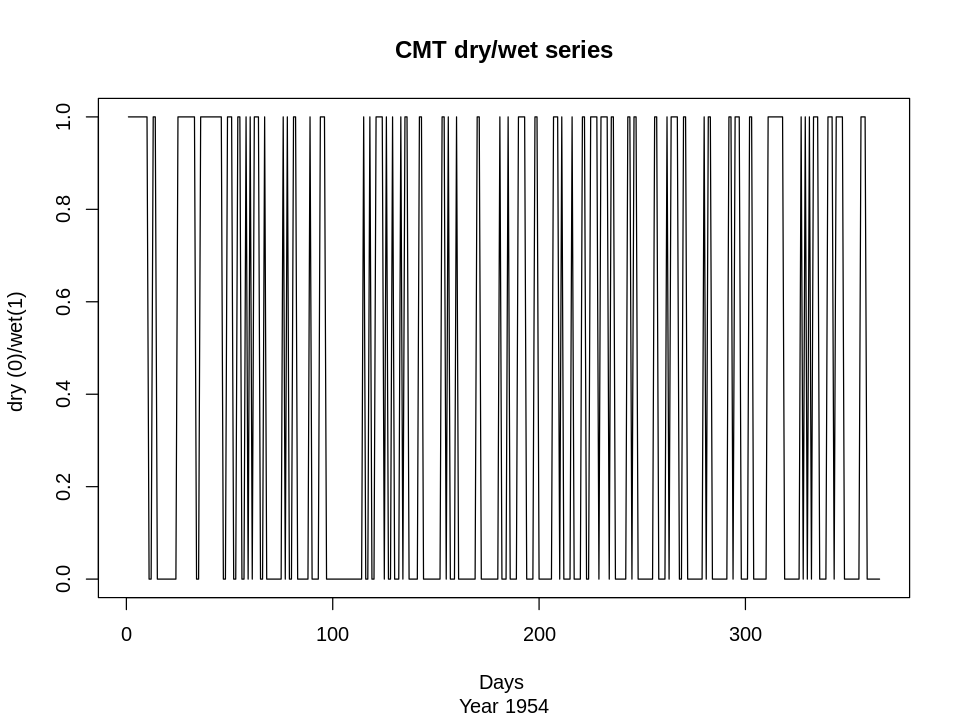

In [17]:
#::GMG::Plot the dry(0)/wet(1) process within year 1954 in both series
#       with threshold 1 (mm ~ l/m²)
th <- 1

start_s<-precip_s$DATE >= 19540101 
end_s<-precip_s$DATE <= 19541231
cond_s<-which(start_s & end_s)
ts<-precip_s$RR[cond_s]/10 # units (mm ~ l/m²)
paste('Selected CMT:',length(ts),' year 1954 (mm ~ l/m²) samples.')
ocurrence_s <- as.integer(ts >= th);
plot(ocurrence_s, type="l", main="CMT dry/wet series", sub = "Year 1954",
   xlab="Days ", ylab="dry (0)/wet(1) ")

[1] "Selected Parayas: 365 year 1954 (mm ~ l/m²) samples."

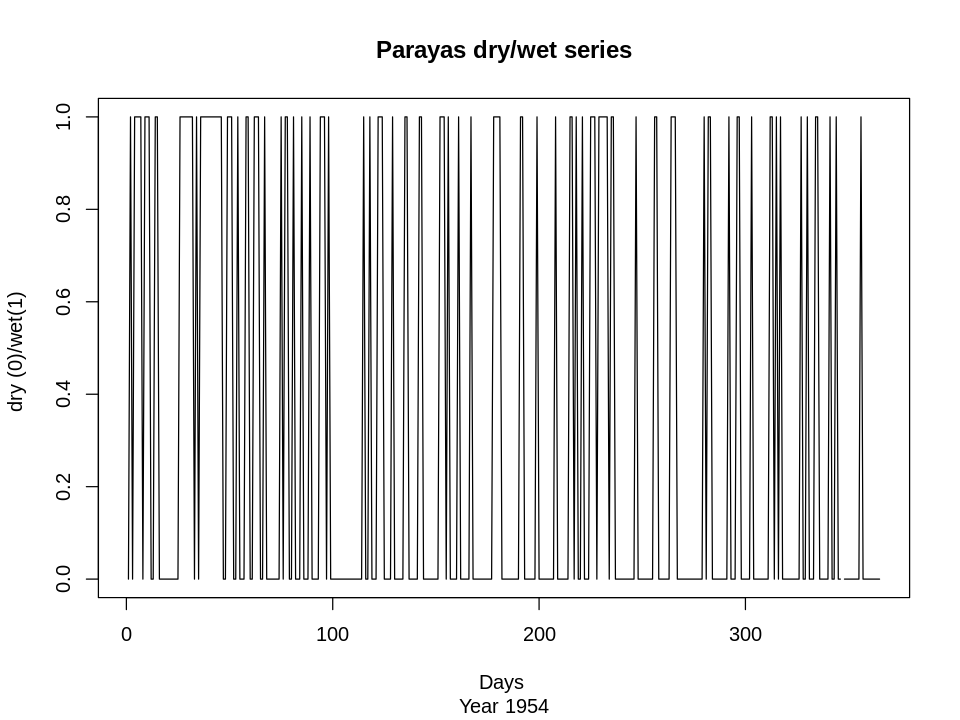

In [18]:
start_p<-precip_p$DATE >= 19540101 
end_p<-precip_p$DATE <= 19541231
cond_p<-which(start_p & end_p)
tp<-precip_p$RR[cond_p]/10 # units (mm ~ l/m²)
paste('Selected Parayas:',length(tp),'year 1954 (mm ~ l/m²) samples.')
ocurrence_p <- as.integer(tp >= th);
plot(ocurrence_p, type="l", main="Parayas dry/wet series", sub = "Year 1954",
   xlab="Days ", ylab="dry (0)/wet(1) ")

#### ::GMG::Task 8

In order to generate a synthetic precipitation series for Santander I use the function `runif` which generates random uniform numbers with default range between 0 and 1, which can be viewed as probabilities per day. Then, random numbers below the rain frequency, calculated as __pwet_s__ and __pwet_p__ in _Task 5_, can be converted to one (wet) and numbers above that threshold to zero (dry).

::GMG::References used in this task

 - [R documentatiom: (x)unif](https://www.rdocumentation.org/packages/compositions/versions/1.40-2/topics/runif)
 - [R manual: The Uniform Distribution](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Uniform.html)
 - [STHDA: Add legends to plots in R software : the easiest way!](http://www.sthda.com/english/wiki/add-legends-to-plots-in-r-software-the-easiest-way)

In [19]:
#::GMG::Arguments of runif
args(runif)

function (n, min = 0, max = 1) 
NULL

[1] "::GMG::Random uniform generated series: 365 samples of type numeric"

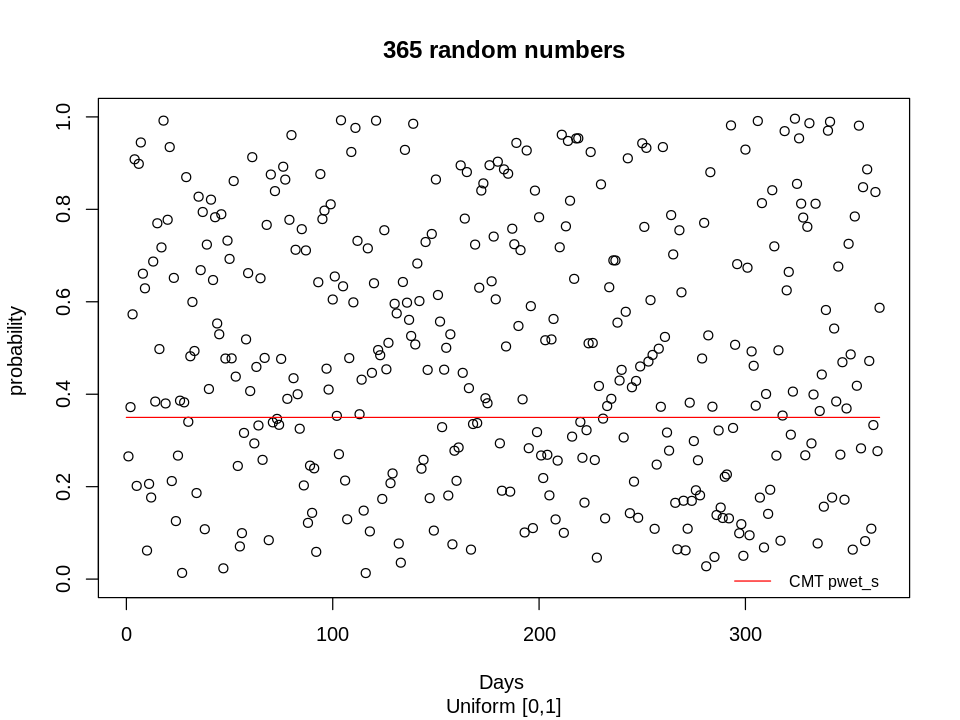

In [20]:
#::GMG::Obtain a series of 365 uniform numbers (between 0 and 1). 
#       Use the frequency tresholds for Santander (CMT) to convert to 0 or 1 values
days<-365
set.seed(1) # use the same random series from now on
s<-runif(days)
paste('::GMG::Random uniform generated series:',length(s),'samples of type', class(s))
plot(s, type = 'p', col = 'black', 
     ylim = c(0,1),xlim = c(1,days),
     xlab='Days ', ylab='probability ',
     main='365 random numbers', sub = 'Uniform [0,1]')
lines(c(0,days),c(pwet_s,pwet_s), col = 'red')
legend('bottomright', legend=c('CMT pwet_s'),
       col=c('red'), lty=1:2, cex=0.8,
       box.lty=0, bg='transparent')

[1] "Synthetic CMT series (pwet_s): 365 ( numeric ) dry: 235 wet: 130"

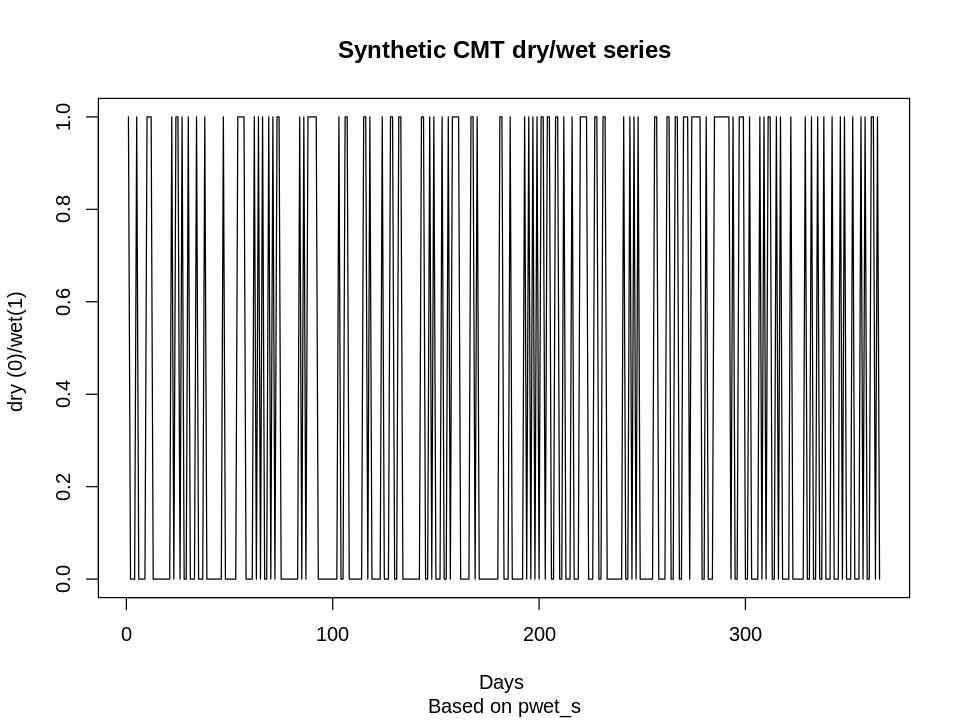

In [21]:
#::GMG::Plot the synthetic series based on pwet_s
wet<-1
dry<-0

dry.wet.fun <- function(x,p) ifelse((x < p), wet, dry)
s.dry.wet<-sapply(FUN = dry.wet.fun,X = s,p = pwet_s)

paste('Synthetic CMT series (pwet_s):',length(s.dry.wet),
      '(',class(s.dry.wet),')',
      'dry:',length(which(s.dry.wet == dry)),
      'wet:',length(which(s.dry.wet == wet)))

plot(s.dry.wet, type="l", main="Synthetic CMT dry/wet series", sub = "Based on pwet_s",
   xlab="Days ", ylab="dry (0)/wet(1) ")

#### ::GMG::Task 9

The series does not resemble the real one very much, since real precipitation is autocorrelated (sequences of zeros/ones), whereas the random numbers are not. Therefore, modify the code using the transition probabilities to generate rain ocurrence considering the transition probabilities.

In [22]:
#::GMG::I've already calculated/estimated the transtition probabilites from both series
#       within a time period 1954-2017 (31/10/2017)
print("CMT precipitation series:")
paste('Pww:',p.wet.wet_s,'Pwd:',p.wet.dry_s,
      'Pdw:',p.dry.wet_s,'Pdd:',p.dry.dry_s)

print("Parayas precipitation series:")
paste('Pww:',p.wet.wet_p,'Pwd:',p.wet.dry_p,
      'Pdw:',p.dry.wet_p,'Pdd:',p.dry.dry_p)

[1] "CMT precipitation series:"


[1] "Pww: 0.199365188298876 Pwd: 0.800634811701124 Pdw: 0.500343141460067 Pdd: 0.499656858539933"

[1] "Parayas precipitation series:"


[1] "Pww: 0.189328300591919 Pwd: 0.810671699408081 Pdw: 0.51466929741786 Pdd: 0.48533070258214"

[1] "Synthetic series: 365 ( numeric )"

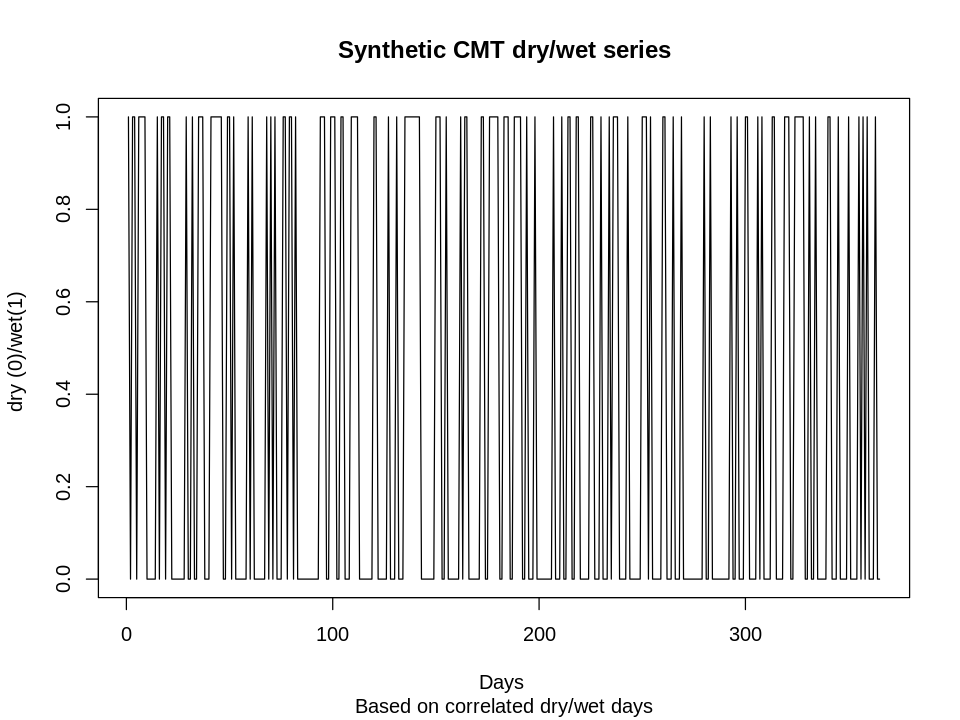

In [23]:
#::GMG::I generate the simulation precipitation series again but this time taking into
#         account the dependence (correlation) between dry/wet days:
#         p.dry.wet (p.dry.dry) [dry] <----> [wet] p.wet.dry (p.wet.wet)
days<-365
wet<-1
dry<-0

set.seed(1)
s<-runif(days)

#::GMG::The starting point: our synthetic series without correlation
paste('Synthetic series:',length(s),
      '(',class(s),')')

#::GMG::First I calculate independent wet/dry vector
s.dry.wet.markov <-sapply(FUN = function(x,p) ifelse((x < p), wet, dry),
                          X = s,
                          p = pwet_s)

#::GMG::Then I simulate the occurrence of wet/dry days with a for loop
for (k in 1:length(s)-1){
    ifelse ((s[k] < pwet_s),
            s.dry.wet.markov[k+1] <- ifelse((s[k+1] < p.wet.dry_s),dry,wet), 
            s.dry.wet.markov[k+1] <- ifelse((s[k+1] < p.dry.dry_s),dry,wet))
}

plot(s.dry.wet.markov, type="l", 
     main="Synthetic CMT dry/wet series", sub = "Based on correlated dry/wet days",
     xlab="Days ", ylab="dry (0)/wet(1) ")

[1] "::GMG::Comprobación: TRUE"

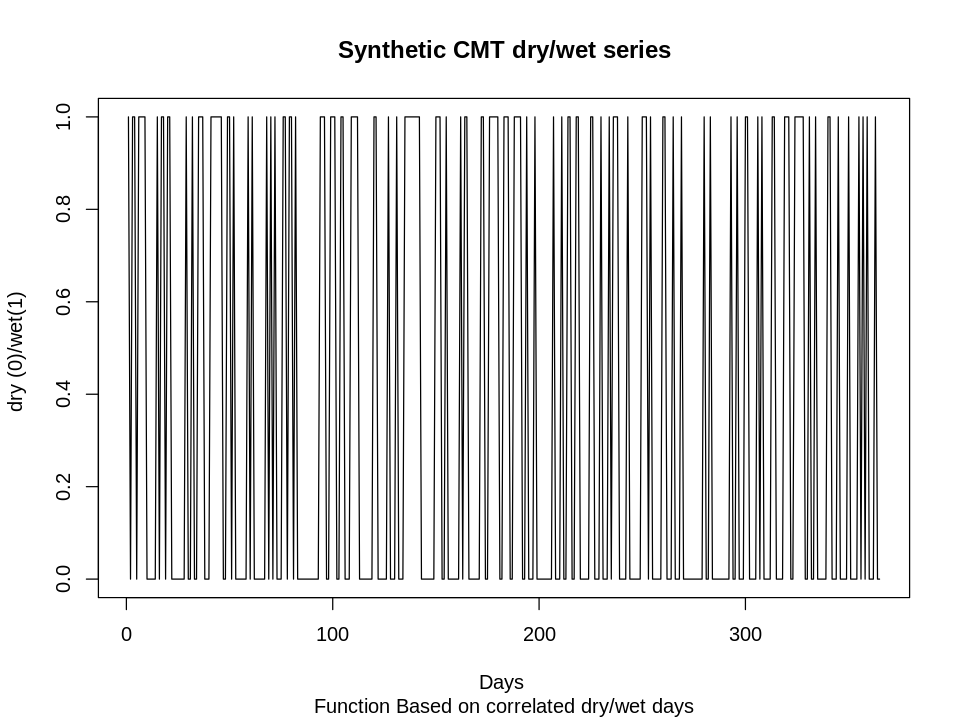

In [24]:
# define a function with arguments for the transition probabilities
# and the number of simulated days and output the simulated series
# plot the result (for a year)

series.fun = function (d,p,q,r) {
    dry <- 0
    wet <- 1
    set.seed(1)
    x <- runif(d)
    u <- sapply(
         FUN = function(s,pr) ifelse((s < pr), wet, dry), 
         X = x, 
         pr = p)
    for (k in 1:length(x)-1){
      ifelse ((x[k] < p),
               u[k+1] <- ifelse((x[k+1] < q),dry,wet),
               u[k+1] <- ifelse((x[k+1] < r),dry,wet))
    }
    return (u)
}

s.dry.wet.markov.2 = series.fun(days,pwet_s,p.wet.dry_s,p.dry.dry_s)
paste('::GMG::Comprobación:',identical(s.dry.wet.markov,s.dry.wet.markov.2))

plot(s.dry.wet.markov.2, type="l", 
     main="Synthetic CMT dry/wet series", sub = "Function Based on correlated dry/wet days",
     xlab="Days ", ylab="dry (0)/wet(1) ")

#### ::GMG::Task 10

Could you think of a more efficient way of implementing the above function?. Thy to avoid the use of loops by means of vectorized operations.

In [25]:
# vectorized implementation
# insert your code here
#::GMG::My proposal

#::GMG::Original
t = function(n,p,q,r) {
    set.seed(1)
    v <- runif(n)
    u <- sapply(
         FUN = function(s,pr) ifelse((s < pr), 1, 0), 
         X = v, 
         pr = p)
    for (k in 1:length(v)-1){
      ifelse ((v[k] < p),
               u[k+1] <- ifelse((v[k+1] < q),0,1),
               u[k+1] <- ifelse((v[k+1] < r),0,1))
    }
    return (u)    
}

#::GMG::Vecrotized building a 2xdays-1 transtion matrix by columns ti,ti+1 and
#       appplying the ifelse markov transition
f = function(n,p,q,r) {
    set.seed(1)
    v <- runif(n)
    f <- ifelse((v[1] < p),1,0)
    t<-matrix(data = c(v[1:length(v)-1],v[-1]),nrow = 2,ncol = length(v)-1,byrow = TRUE)
    u<-apply(X = t,MARGIN = 2,FUN = 
            function(x,s,t,u) {
              ifelse ((x[1] < s),
                return(ifelse((x[2] < t),0,1)),
                return(ifelse((x[2] < u),0,1)))
            }, s = p, t = q, u = r)
    return(c(f,u))
}

#Test
prueba = f(days,pwet_s,p.wet.dry_s,p.dry.dry_s)
test = t(days,pwet_s,p.wet.dry_s,p.dry.dry_s)
identical(prueba,test)


[1] TRUE

### 4. Simulating precipitation amount

The precipitation amount for the wet days (occurrence > 0) can be simulated using an exponential distribution. We need to fit a theoretical distribution to the observed in order to obtain the `rate` parameter. As an alternative, you can used instead the mean of the wet days precipitation amount (mean of precip values > 0). Then, we can use the `rexp` function to simulate random values with the obtained rate of the precipitation amount for the wet days (occuDry == 0). 

We need to fit a theoretical distribution to the observed data for each station. The two most commonly used distributions to simulate precipitation are the [Gamma](http://en.wikipedia.org/wiki/Gamma_distribution) and [Exponential](http://en.wikipedia.org/wiki/Exponential_distribution) distributions. We should load the library `MASS` and use the `fitdistr` function.

In [26]:
library(MASS)

In [27]:
#::GMG::I gather 365 samples from year 2016 from each weather station; units (mm ~ l/m²)
start_s<-precip_p$DATE >= 20160101 
end_s<-precip_p$DATE <= 20161231
cond_s<-which(start_s & end_s)
ts<-precip_s$RR[cond_s]/10

start_p<-precip_p$DATE >= 20160101 
end_p<-precip_p$DATE <= 20161231
cond_p<-which(start_p & end_p)
tp<-precip_p$RR[cond_p]/10

#::GMG::I pack the two series in a matrix
weather.stations = matrix(c(ts,tp),nrow = length(tp),ncol = 2, byrow = FALSE)

#::GMG::I use the estimated markov probability matrix to generate simulated wet/dry occurrences 
#       for year 2016 for each weather station without precipitation amount (wet = 1/dry = 0)
ocurrence_sim_s = f(length(ts),pwet_s,p.wet.dry_s,p.dry.dry_s)
ocurrence_sim_p = f(length(tp),pwet_p,p.wet.dry_p,p.dry.dry_p)

#::GMG::I get ready for generating another matrix with two simulated series and precipitation amount
amounts_sim_m <- matrix(data = 0, nrow = dim(weather.stations)[1], ncol = dim(weather.stations)[2])

#::GMG::I take the precipitation amounts for each station and use them to fit a gamma distribution
#       with parameters shape and rate
th<-1
indPrec<-which(weather.stations[,1] >= th)
auxGamma <- fitdistr(weather.stations[indPrec,1],"gamma")
indPrec <- which(ocurrence_sim_s != 0)
amounts_sim_m[indPrec,1] <- rgamma(n = length(indPrec), shape = auxGamma$estimate[1], rate = auxGamma$estimate[2])

indPrec<-which(weather.stations[,2] >= th)
auxGamma <- fitdistr(weather.stations[indPrec,2],"gamma")
indPrec <- which(ocurrence_sim_p != 0)
amounts_sim_m[indPrec,2] <- rgamma(n = length(indPrec), shape = auxGamma$estimate[1], rate = auxGamma$estimate[2])

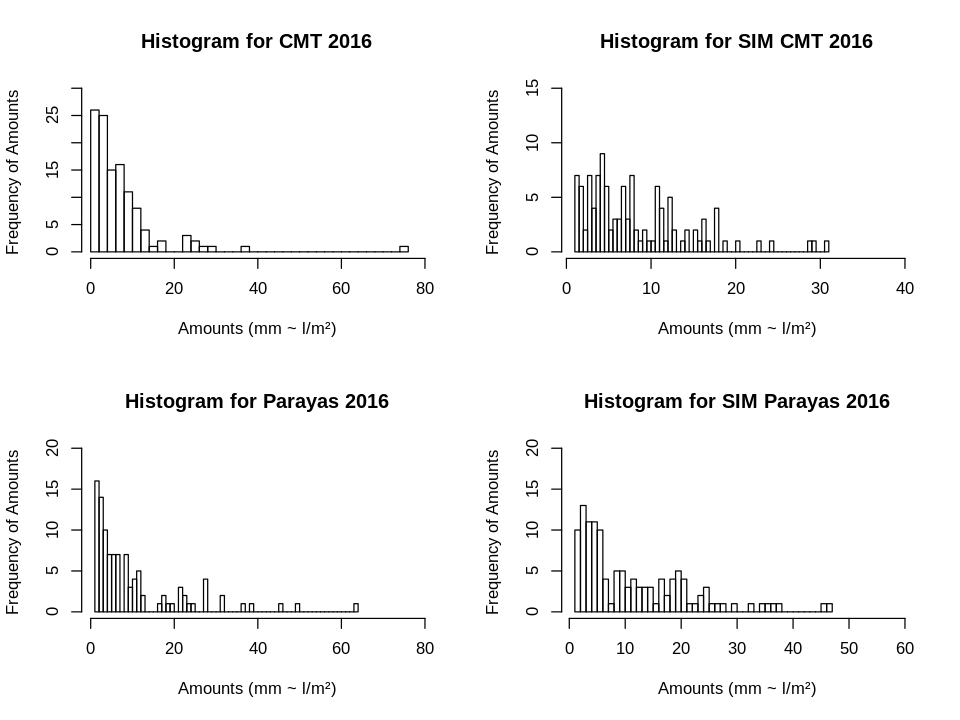

In [42]:
#::GMG::I take a look at the results
par(mfrow = c(2,2))
indPrec<-which(weather.stations[,1] >= th)
hist(weather.stations[indPrec,1], breaks = 50,
     main="Histogram for CMT 2016 ",
     xlab="Amounts (mm ~ l/m²) ",ylab="Frequency of Amounts ",
     xlim=c(1,80), ylim=c(0,30))
indPrec<-which(amounts_sim_m[,1] >= th)
hist(amounts_sim_m[indPrec,1], breaks = 50,
     main="Histogram for SIM CMT 2016 ",
     xlab="Amounts (mm ~ l/m²) ",ylab="Frequency of Amounts ",
     xlim=c(1,40), ylim=c(0,15))
indPrec<-which(weather.stations[,2] >= th)
hist(weather.stations[indPrec,2], breaks = 50,
     main="Histogram for Parayas 2016 ",
     xlab="Amounts (mm ~ l/m²) ",ylab="Frequency of Amounts ",
     xlim=c(1,80), ylim=c(0,20))
indPrec<-which(amounts_sim_m[,2] >= th)
hist(amounts_sim_m[indPrec,2], breaks = 50,
     main="Histogram for SIM Parayas 2016 ",
     xlab="Amounts (mm ~ l/m²) ",ylab="Frequency of Amounts ",
     xlim=c(1,60), ylim=c(0,20))

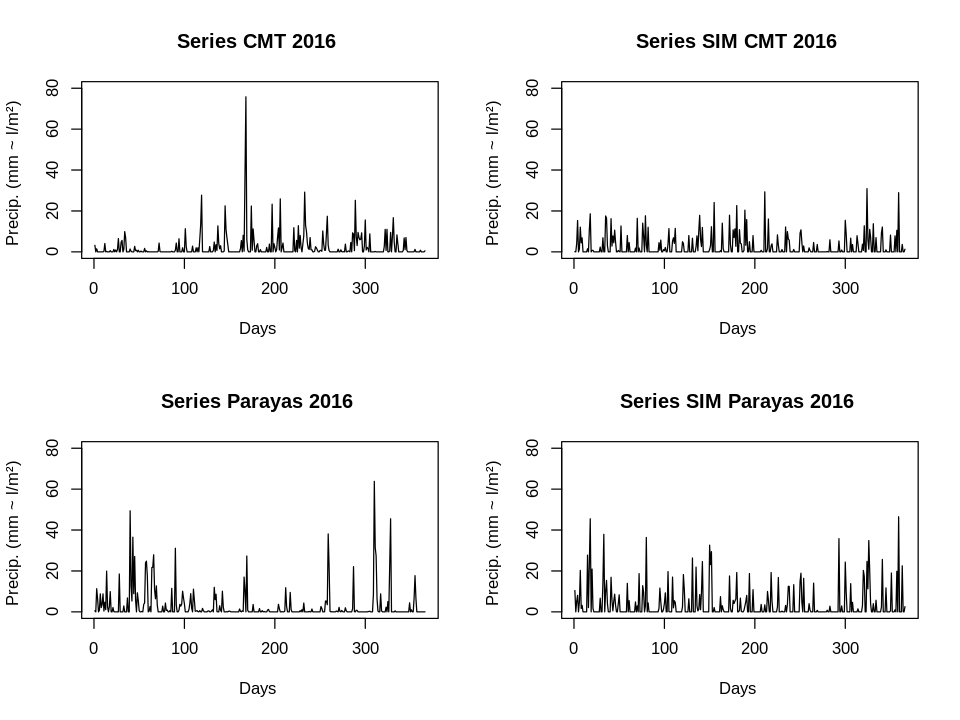

In [46]:
par(mfrow = c(2,2))
plot(weather.stations[,1], type = "l", col = "black", 
     ylim = c(0,80),
     main="Series CMT 2016 ",
     xlab="Days ",ylab="Precip. (mm ~ l/m²) ")
plot(amounts_sim_m[,1], type = "l", col = "black", 
     ylim = c(0,80),
     main="Series SIM CMT 2016 ",
     xlab="Days ",ylab="Precip. (mm ~ l/m²) ")
plot(weather.stations[,2], type = "l", col = "black", 
     ylim = c(0,80),
     main="Series Parayas 2016 ",
     xlab="Days ",ylab="Precip. (mm ~ l/m²) ")
plot(amounts_sim_m[,2], type = "l", col = "black", 
     ylim = c(0,80),
     main="Series SIM Parayas 2016 ",
     xlab="Days ",ylab="Precip. (mm ~ l/m²) ")